데이콘 코드 유사성 판단 AI 경진대회 : https://dacon.io/competitions/official/235900/overview/description

## 필수 라이브러리

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
from tqdm import tqdm

## 데이터 불러오기

In [2]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [3]:
cd '/content/gdrive/My Drive/dataset/code_similarity/'

/content/gdrive/My Drive/dataset/code_similarity


In [4]:
!unzip -qq open.zip

unzip:  cannot find or open open.zip, open.zip.zip or open.zip.ZIP.


In [5]:
ls

baseline.h5  code/  sample_submission.csv  sample_train.csv  test.csv


## 데이터 분석 (EDA)

### 데이터 간단하게 살펴보기

In [6]:
train = pd.read_csv('sample_train.csv')
test = pd.read_csv('test.csv')
submit = pd.read_csv('sample_submission.csv')

In [7]:
# sample train은 진짜 샘플용인듯. test 보다 개수도 작네...;;
# 결국 제대로 학습하려면 직접 조합해서 해야할 듯
train

,code1,code2,similar
0,"flag = ""go""\ncnt = 0\nwhile flag == ""go"":\n ...",# Python 3+\n#--------------------------------...,1
1,"b, c = map(int, input().split())\n\nprint(b * c)",import numpy as np\n\nn = int(input())\na = np...,0
2,import numpy as np\nimport sys\nread = sys.std...,"N, M = map(int, input().split())\nif M%2 != 0:...",0
3,"b, c = map(int, input().split())\n\nprint(b * c)","n,m=map(int,input().split())\nh=list(map(int,i...",0
4,s=input()\nt=input()\nans=0\nfor i in range(le...,"import math\na,b,h,m=map(int,input().split())\...",0
...,...,...,...
17965,"import math\nA, B, H, M = map(int, input().spl...","d,t,s = input().split()\n\nif(int(s) * int(t) ...",0
17966,"n = int(input())\ns, t = input().split()\n\nan...","H,W,N=[int(input()) for i in range(3)]\nprint(...",0
17967,"H,W,k = map(int, input().split())\n# アイテムが何処に何...",from numba import jit\nimport numpy as np\n@ji...,1
17968,#E\nimport math\nn = int(input())\nans = 0\ni ...,#!/usr/bin/env python\n# coding: utf-8\n\n# In...,1


In [8]:
test

,pair_id,code1,code2
0,1,def main():\n s = input()\n if s.count('a') ...,"N,K = map(int,input().split())\nA = list(map(i..."
1,2,"N,K,Q = map(int,input().split())\npoints = [0]...","N, K, Q = map(int,input().split())\n\nif K > Q..."
2,3,from itertools import combinations\nn = int(in...,s = input()\nt = input()\nlength_s = len(s)\nl...
3,4,"a,b=map(int,input().split())\n\nans1=a+b\nans2...","a, b, c, d = map(int,input().split())\n\nif a ..."
4,5,S = input()\nK = int(input())\n\nind = -1\nfor...,"H, W = map(int, input().split())\ngrid = []\nf..."
...,...,...,...
179695,179696,N = int(input())\nS = input()\nS_rep = S.repla...,N = int(input())\nS = list(input())\n\nrow = [...
179696,179697,import sys\ndef input(): return sys.stdin.read...,"h,w,a,b = (int(i) for i in input().split())\nf..."
179697,179698,"a = list(map(int, input().split()))\n\na1 = ab...","print('YNEOS'[sorted(input().split())!=['1','4..."
179698,179699,"\n\nH,W,A,B = map(int,input().split())\n\ns = ...","h, w, a, b = map(int, input().split())\nmat = ..."


In [9]:
train['code1'][0]

'flag = "go"\ncnt = 0\nwhile flag == "go":\n    cnt += 1\n    x = int(input())\n    if x == 0:\n        flag = "stop"\n    else:\n        print("Case " + str(cnt) + ": " + str(x))\n'

In [10]:
print(train['code1'][0])

flag = "go"
cnt = 0
while flag == "go":
    cnt += 1
    x = int(input())
    if x == 0:
        flag = "stop"
    else:
        print("Case " + str(cnt) + ": " + str(x))



### 코드 길이 분석

In [11]:
train['code1'].str.len()

0         171
1          46
2        1280
3          46
4          88
         ... 
17965     220
17966     121
17967    1214
17968     198
17969     249
Name: code1, Length: 17970, dtype: int64

In [12]:
# 압도적으로 길이가 긴 뭔가가 있네..
train['code1'].str.len().sort_values()

519          21
14550        23
17488        24
8680         25
17094        25
          ...  
14376      5306
3254       5315
11838      7242
16420     11361
12443    426657
Name: code1, Length: 17970, dtype: int64

In [13]:
max_len = np.max(train['code1'].str.len())
min_len = np.min(train['code1'].str.len())
mean_len = np.mean(train['code1'].str.len())

print(max_len, min_len, mean_len)

426657 21 406.63355592654426


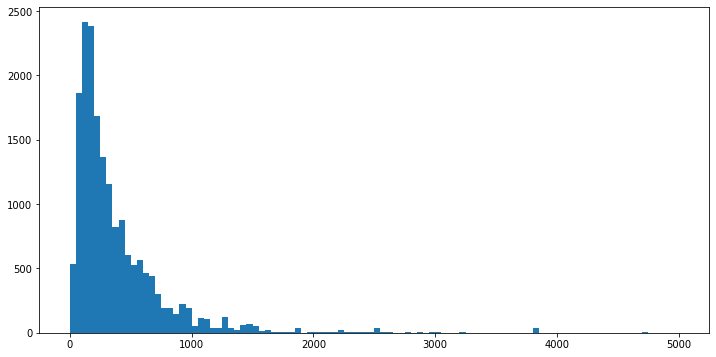

In [14]:
plt.figure(figsize=(12, 6))
plt.hist(train['code1'].str.len(), range=[0, 5000], bins=100)
plt.show()

## 데이터 전처리

### 원핫인코딩

In [15]:
train = pd.get_dummies(train, columns=['similar']) 

In [16]:
train

,code1,code2,similar_0,similar_1
0,"flag = ""go""\ncnt = 0\nwhile flag == ""go"":\n ...",# Python 3+\n#--------------------------------...,0,1
1,"b, c = map(int, input().split())\n\nprint(b * c)",import numpy as np\n\nn = int(input())\na = np...,1,0
2,import numpy as np\nimport sys\nread = sys.std...,"N, M = map(int, input().split())\nif M%2 != 0:...",1,0
3,"b, c = map(int, input().split())\n\nprint(b * c)","n,m=map(int,input().split())\nh=list(map(int,i...",1,0
4,s=input()\nt=input()\nans=0\nfor i in range(le...,"import math\na,b,h,m=map(int,input().split())\...",1,0
...,...,...,...,...
17965,"import math\nA, B, H, M = map(int, input().spl...","d,t,s = input().split()\n\nif(int(s) * int(t) ...",1,0
17966,"n = int(input())\ns, t = input().split()\n\nan...","H,W,N=[int(input()) for i in range(3)]\nprint(...",1,0
17967,"H,W,k = map(int, input().split())\n# アイテムが何処に何...",from numba import jit\nimport numpy as np\n@ji...,0,1
17968,#E\nimport math\nn = int(input())\nans = 0\ni ...,#!/usr/bin/env python\n# coding: utf-8\n\n# In...,0,1


### 학습, 검증 데이터 셋 분리

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
train_data, val_data, train_labels, val_labels = \
	train_test_split(train[['code1', 'code2']], train[['similar_0', 'similar_1']], test_size=0.3, random_state=0, stratify=train[['similar_0', 'similar_1']])

KeyError: ignored

In [ ]:
train_data = train_data.reset_index(drop=True)
val_data = val_data.reset_index(drop=True)

train_labels = train_labels.reset_index(drop=True)
val_labels = val_labels.reset_index(drop=True)

In [ ]:
print(train_data.shape, train_labels.shape)
print(val_data.shape, val_labels.shape)

## Baseline 모델

### 학습에 필요한 라이브러리

In [8]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.2 MB 7.6 MB/s 
     |████████████████████████████████| 86 kB 6.0 MB/s 
     |████████████████████████████████| 6.6 MB 52.7 MB/s 
     |████████████████████████████████| 596 kB 73.1 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [9]:
import tensorflow as tf
from tensorflow.keras.utils import Sequence

import transformers
from transformers import BertTokenizer, BertConfig, TFBertModel
from transformers.utils import logging


In [10]:
#physical_devices = tf.config.list_physical_devices('GPU')
#tf.config.experimental.set_memory_growth(physical_devices[0], enable=True)

logging.set_verbosity_error()

### Custome Data Generator

In [11]:
# 참고 : https://keras.io/examples/nlp/semantic_similarity_with_bert/

class BertSemanticDataGenerator(Sequence):
    """Generates batches of data.

    Args:
        sentence_pairs: Array of premise and hypothesis input sentences.
        labels: Array of labels.
        batch_size: Integer batch size.
        shuffle: boolean, whether to shuffle the data.
        include_targets: boolean, whether to incude the labels.

    Returns:
        Tuples `([input_ids, attention_mask, `token_type_ids], labels)`
        (or just `[input_ids, attention_mask, `token_type_ids]`
         if `include_targets=False`)
    """

    def __init__(
        self,
        sentence_pairs,
        labels,
        batch_size=32,
        shuffle=True,
        include_targets=True,
    ):
        self.sentence_pairs = sentence_pairs
        self.labels = labels
        self.shuffle = shuffle
        self.batch_size = batch_size
        self.include_targets = include_targets
        
        # Load our BERT Tokenizer to encode the text.
        # We will use base-base-uncased pretrained model.
        self.tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
        self.indexes = np.arange(len(self.sentence_pairs))
        self.on_epoch_end()
    

    def __len__(self):
        # Denotes the number of batches per epoch.
        return len(self.sentence_pairs) // self.batch_size


    def __getitem__(self, idx):
        # 배치 하나당 범위 지정
        indexes = self.indexes[idx * self.batch_size : (idx + 1) * self.batch_size]
        sentence_pairs = self.sentence_pairs[indexes]

        #print('encoded prev')
        #print(sentence_pairs.tolist())

        # With BERT tokenizer's batch_encode_plus batch of both the sentences are
        # encoded together and separated by [SEP] token.
        encoded = self.tokenizer.batch_encode_plus(
            sentence_pairs.tolist(),
            add_special_tokens=True,
            max_length=256,
            truncation=True,
            return_attention_mask=True,
            return_token_type_ids=True,
            padding=True,
            return_tensors="tf",
        )
        #print('encoded after')

        # Convert batch of encoded features to numpy array.
        input_ids = np.array(encoded["input_ids"], dtype="int32")
        attention_masks = np.array(encoded["attention_mask"], dtype="int32")
        token_type_ids = np.array(encoded["token_type_ids"], dtype="int32")

        # Set to true if data generator is used for training/validation.
        if self.include_targets:
            labels = np.array(self.labels[indexes], dtype="int32")
            #print([input_ids, attention_masks, token_type_ids], labels)
            return [input_ids, attention_masks, token_type_ids], labels
        else:
            return [input_ids, attention_masks, token_type_ids]


    # epoch 끝날때마다 shuffle하는 역할
    def on_epoch_end(self):
        # Shuffle indexes after each epoch if shuffle is set to True.
        if self.shuffle:
            np.random.RandomState(42).shuffle(self.indexes)

In [25]:
train_dataset = BertSemanticDataGenerator(
    train_data[["code1", "code2"]].values.astype("str"),
    train_labels[["similar_0", "similar_1"]].values,
    batch_size=32,
    shuffle=True,
)
valid_dataset = BertSemanticDataGenerator(
    val_data[["code1", "code2"]].values.astype("str"),
    val_labels[["similar_0", "similar_1"]].values,
    batch_size=32,
    shuffle=False,
)

In [ ]:
train_dataset.__getitem__(0)

### 모델 만들기

In [12]:
# Encoded token ids from BERT tokenizer.
input_ids = tf.keras.layers.Input(
    shape=(256,), dtype=tf.int32, name="input_ids"
)
# Attention masks indicates to the model which tokens should be attended to.
attention_masks = tf.keras.layers.Input(
    shape=(256,), dtype=tf.int32, name="attention_masks"
)
# Token type ids are binary masks identifying different sequences in the model.
token_type_ids = tf.keras.layers.Input(
    shape=(256,), dtype=tf.int32, name="token_type_ids"
)

# Loading pretrained BERT model.
bert_model = TFBertModel.from_pretrained("bert-base-uncased")
# Freeze the BERT model to reuse the pretrained features without modifying them.
bert_model.trainable = False
bert_output = bert_model(
    input_ids, attention_mask=attention_masks, token_type_ids=token_type_ids
)

sequence_output = bert_output.last_hidden_state

# Add trainable layers on top of frozen layers to adapt the pretrained features on the new data.
bi_lstm = tf.keras.layers.Bidirectional(
    tf.keras.layers.LSTM(64, return_sequences=True)
)(sequence_output)

# Applying hybrid pooling approach to bi_lstm sequence output.
avg_pool = tf.keras.layers.GlobalAveragePooling1D()(bi_lstm)
max_pool = tf.keras.layers.GlobalMaxPooling1D()(bi_lstm)
concat = tf.keras.layers.concatenate([avg_pool, max_pool])
dropout = tf.keras.layers.Dropout(0.3)(concat)
output = tf.keras.layers.Dense(2, activation="softmax")(dropout)

model = tf.keras.models.Model(
    inputs=[input_ids, attention_masks, token_type_ids], outputs=output
)

model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss="categorical_crossentropy",
    metrics=["acc"],
)

model.summary()

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/511M [00:00<?, ?B/s]

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 256)]        0           []                               
                                                                                                  
 attention_masks (InputLayer)   [(None, 256)]        0           []                               
                                                                                                  
 token_type_ids (InputLayer)    [(None, 256)]        0           []                               
                                                                                                  
 tf_bert_model (TFBertModel)    TFBaseModelOutputWi  109482240   ['input_ids[0][0]',              
                                thPoolingAndCrossAt               'attention_masks[0][0]',    

In [27]:
history = model.fit(train_dataset, validation_data=valid_dataset, 
                    epochs=2, verbose=1)

Epoch 1/2
393/393 [==============================] - 233s 555ms/step - loss: 0.4607 - acc: 0.7791 - val_loss: 0.3641 - val_acc: 0.8371
Epoch 2/2
393/393 [==============================] - 214s 546ms/step - loss: 0.3391 - acc: 0.8511 - val_loss: 0.2577 - val_acc: 0.8951


In [ ]:
# model.save("baseline.h5")

### 테스트 결과 

In [35]:
test

,pair_id,code1,code2
0,1,def main():\n s = input()\n if s.count('a') ...,"N,K = map(int,input().split())\nA = list(map(i..."
1,2,"N,K,Q = map(int,input().split())\npoints = [0]...","N, K, Q = map(int,input().split())\n\nif K > Q..."
2,3,from itertools import combinations\nn = int(in...,s = input()\nt = input()\nlength_s = len(s)\nl...
3,4,"a,b=map(int,input().split())\n\nans1=a+b\nans2...","a, b, c, d = map(int,input().split())\n\nif a ..."
4,5,S = input()\nK = int(input())\n\nind = -1\nfor...,"H, W = map(int, input().split())\ngrid = []\nf..."
...,...,...,...
179695,179696,N = int(input())\nS = input()\nS_rep = S.repla...,N = int(input())\nS = list(input())\n\nrow = [...
179696,179697,import sys\ndef input(): return sys.stdin.read...,"h,w,a,b = (int(i) for i in input().split())\nf..."
179697,179698,"a = list(map(int, input().split()))\n\na1 = ab...","print('YNEOS'[sorted(input().split())!=['1','4..."
179698,179699,"\n\nH,W,A,B = map(int,input().split())\n\ns = ...","h, w, a, b = map(int, input().split())\nmat = ..."


In [44]:
submit

,pair_id,similar
0,1,0
1,2,1
2,3,0
3,4,0
4,5,0
...,...,...
179695,179696,-1
179696,179697,-1
179697,179698,-1
179698,179699,-1


In [13]:
model.load_weights("baseline.h5")

In [18]:
def check_similarity(sentence_pairs):
    test_data = BertSemanticDataGenerator(
        sentence_pairs, labels=None, batch_size=1024, shuffle=False, include_targets=False,
    )
    proba = model.predict(test_data[0])
    return proba

    #proba = model.predict(test_data[0])[0]
    #print(proba)

In [19]:
batch_size = 1024
pair_id = 1
idx = 0
similar = []

for _ in tqdm(range(0, 179700, batch_size)):
    print('for문 반복', idx)
    proba = check_similarity(
        test.loc[idx * batch_size : (idx + 1) * batch_size][['code1', 'code2']].values
    )

    print('proba len:', len(proba))
    for prob in proba:
        if prob[0] >= prob[1]:
            #print('No similarity')
            similar.append(0)
            submit.loc[submit.pair_id == pair_id, 'similar'] = 0
        else:
            #print('similarity')
            similar.append(1)
            submit.loc[submit.pair_id == pair_id, 'similar'] = 1
        pair_id += 1
    
    idx += 1
    

  0%|          | 0/176 [00:00<?, ?it/s]

for문 반복 0
proba len: 1024


  1%|          | 1/176 [00:16<47:38, 16.34s/it]

for문 반복 1
proba len: 1024


  1%|          | 2/176 [00:32<46:30, 16.04s/it]

for문 반복 2
proba len: 1024


  2%|▏         | 3/176 [00:48<46:05, 15.99s/it]

for문 반복 3
proba len: 1024


  2%|▏         | 4/176 [01:03<45:40, 15.93s/it]

for문 반복 4
proba len: 1024


  3%|▎         | 5/176 [01:20<45:57, 16.12s/it]

for문 반복 5
proba len: 1024


  3%|▎         | 6/176 [01:36<45:29, 16.05s/it]

for문 반복 6
proba len: 1024


  4%|▍         | 7/176 [01:52<45:10, 16.04s/it]

for문 반복 7
proba len: 1024


  5%|▍         | 8/176 [02:08<44:48, 16.00s/it]

for문 반복 8
proba len: 1024


  5%|▌         | 9/176 [02:24<44:27, 15.97s/it]

for문 반복 9
proba len: 1024


  6%|▌         | 10/176 [02:40<44:06, 15.94s/it]

for문 반복 10
proba len: 1024


  6%|▋         | 11/176 [02:56<43:53, 15.96s/it]

for문 반복 11
proba len: 1024


  7%|▋         | 12/176 [03:12<43:41, 15.99s/it]

for문 반복 12
proba len: 1024


  7%|▋         | 13/176 [03:28<43:22, 15.97s/it]

for문 반복 13
proba len: 1024


  8%|▊         | 14/176 [03:43<43:04, 15.95s/it]

for문 반복 14
proba len: 1024


  9%|▊         | 15/176 [03:59<42:44, 15.93s/it]

for문 반복 15
proba len: 1024


  9%|▉         | 16/176 [04:15<42:30, 15.94s/it]

for문 반복 16
proba len: 1024


 10%|▉         | 17/176 [04:31<42:22, 15.99s/it]

for문 반복 17
proba len: 1024


 10%|█         | 18/176 [04:47<41:55, 15.92s/it]

for문 반복 18
proba len: 1024


 11%|█         | 19/176 [05:03<41:44, 15.95s/it]

for문 반복 19
proba len: 1024


 11%|█▏        | 20/176 [05:19<41:25, 15.94s/it]

for문 반복 20
proba len: 1024


 12%|█▏        | 21/176 [05:35<41:09, 15.93s/it]

for문 반복 21
proba len: 1024


 12%|█▎        | 22/176 [05:51<40:48, 15.90s/it]

for문 반복 22
proba len: 1024


 13%|█▎        | 23/176 [06:07<40:36, 15.93s/it]

for문 반복 23
proba len: 1024


 14%|█▎        | 24/176 [06:23<40:23, 15.94s/it]

for문 반복 24
proba len: 1024


 14%|█▍        | 25/176 [06:39<40:10, 15.97s/it]

for문 반복 25
proba len: 1024


 15%|█▍        | 26/176 [06:55<40:04, 16.03s/it]

for문 반복 26
proba len: 1024


 15%|█▌        | 27/176 [07:11<39:41, 15.98s/it]

for문 반복 27
proba len: 1024


 16%|█▌        | 28/176 [07:27<39:23, 15.97s/it]

for문 반복 28
proba len: 1024


 16%|█▋        | 29/176 [07:43<39:17, 16.04s/it]

for문 반복 29
proba len: 1024


 17%|█▋        | 30/176 [07:59<39:00, 16.03s/it]

for문 반복 30
proba len: 1024


 18%|█▊        | 31/176 [08:15<38:45, 16.04s/it]

for문 반복 31
proba len: 1024


 18%|█▊        | 32/176 [08:31<38:24, 16.00s/it]

for문 반복 32
proba len: 1024


 19%|█▉        | 33/176 [08:47<38:04, 15.97s/it]

for문 반복 33
proba len: 1024


 19%|█▉        | 34/176 [09:03<37:43, 15.94s/it]

for문 반복 34
proba len: 1024


 20%|█▉        | 35/176 [09:19<37:28, 15.95s/it]

for문 반복 35
proba len: 1024


 20%|██        | 36/176 [09:35<37:12, 15.95s/it]

for문 반복 36
proba len: 1024


 21%|██        | 37/176 [09:51<36:57, 15.96s/it]

for문 반복 37
proba len: 1024


 22%|██▏       | 38/176 [10:07<36:41, 15.95s/it]

for문 반복 38
proba len: 1024


 22%|██▏       | 39/176 [10:23<36:28, 15.98s/it]

for문 반복 39
proba len: 1024


 23%|██▎       | 40/176 [10:38<36:06, 15.93s/it]

for문 반복 40
proba len: 1024


 23%|██▎       | 41/176 [10:54<35:48, 15.92s/it]

for문 반복 41
proba len: 1024


 24%|██▍       | 42/176 [11:34<51:45, 23.17s/it]

for문 반복 42
proba len: 1024


 24%|██▍       | 43/176 [11:50<46:35, 21.02s/it]

for문 반복 43
proba len: 1024


 25%|██▌       | 44/176 [12:06<42:48, 19.46s/it]

for문 반복 44
proba len: 1024


 26%|██▌       | 45/176 [12:23<40:54, 18.74s/it]

for문 반복 45
proba len: 1024


 26%|██▌       | 46/176 [12:39<38:45, 17.89s/it]

for문 반복 46
proba len: 1024


 27%|██▋       | 47/176 [12:55<37:06, 17.26s/it]

for문 반복 47
proba len: 1024


 27%|██▋       | 48/176 [13:11<35:58, 16.87s/it]

for문 반복 48
proba len: 1024


 28%|██▊       | 49/176 [13:50<49:57, 23.60s/it]

for문 반복 49
proba len: 1024


 28%|██▊       | 50/176 [14:06<44:52, 21.37s/it]

for문 반복 50
proba len: 1024


 29%|██▉       | 51/176 [14:22<41:07, 19.74s/it]

for문 반복 51
proba len: 1024


 30%|██▉       | 52/176 [14:38<38:24, 18.58s/it]

for문 반복 52
proba len: 1024


 30%|███       | 53/176 [14:54<36:27, 17.78s/it]

for문 반복 53
proba len: 1024


 31%|███       | 54/176 [15:10<35:01, 17.23s/it]

for문 반복 54
proba len: 1024


 31%|███▏      | 55/176 [15:26<33:55, 16.83s/it]

for문 반복 55
proba len: 1024


 32%|███▏      | 56/176 [15:42<33:08, 16.57s/it]

for문 반복 56
proba len: 1024


 32%|███▏      | 57/176 [15:58<32:30, 16.39s/it]

for문 반복 57
proba len: 1024


 33%|███▎      | 58/176 [16:14<31:59, 16.27s/it]

for문 반복 58
proba len: 1024


 34%|███▎      | 59/176 [16:30<31:33, 16.18s/it]

for문 반복 59
proba len: 1024


 34%|███▍      | 60/176 [16:46<31:05, 16.08s/it]

for문 반복 60
proba len: 1024


 35%|███▍      | 61/176 [17:02<30:39, 16.00s/it]

for문 반복 61
proba len: 1024


 35%|███▌      | 62/176 [17:17<30:21, 15.97s/it]

for문 반복 62
proba len: 1024


 36%|███▌      | 63/176 [17:34<30:10, 16.02s/it]

for문 반복 63
proba len: 1024


 36%|███▋      | 64/176 [17:49<29:45, 15.94s/it]

for문 반복 64
proba len: 1024


 37%|███▋      | 65/176 [18:05<29:28, 15.93s/it]

for문 반복 65
proba len: 1024


 38%|███▊      | 66/176 [18:21<29:07, 15.89s/it]

for문 반복 66
proba len: 1024


 38%|███▊      | 67/176 [18:37<28:57, 15.94s/it]

for문 반복 67
proba len: 1024


 39%|███▊      | 68/176 [18:53<28:40, 15.93s/it]

for문 반복 68
proba len: 1024


 39%|███▉      | 69/176 [19:09<28:36, 16.04s/it]

for문 반복 69
proba len: 1024


 40%|███▉      | 70/176 [19:25<28:23, 16.07s/it]

for문 반복 70
proba len: 1024


 40%|████      | 71/176 [19:41<28:05, 16.05s/it]

for문 반복 71
proba len: 1024


 41%|████      | 72/176 [19:57<27:42, 15.98s/it]

for문 반복 72
proba len: 1024


 41%|████▏     | 73/176 [20:13<27:26, 15.99s/it]

for문 반복 73
proba len: 1024


 42%|████▏     | 74/176 [20:53<39:07, 23.02s/it]

for문 반복 74
proba len: 1024


 43%|████▎     | 75/176 [21:09<35:09, 20.89s/it]

for문 반복 75
proba len: 1024


 43%|████▎     | 76/176 [21:48<44:19, 26.59s/it]

for문 반복 76
proba len: 1024


 44%|████▍     | 77/176 [22:04<38:38, 23.41s/it]

for문 반복 77
proba len: 1024


 44%|████▍     | 78/176 [22:21<34:37, 21.20s/it]

for문 반복 78
proba len: 1024


 45%|████▍     | 79/176 [22:36<31:42, 19.62s/it]

for문 반복 79
proba len: 1024


 45%|████▌     | 80/176 [22:52<29:33, 18.47s/it]

for문 반복 80
proba len: 1024


 46%|████▌     | 81/176 [23:08<28:02, 17.71s/it]

for문 반복 81
proba len: 1024


 47%|████▋     | 82/176 [23:24<26:50, 17.13s/it]

for문 반복 82
proba len: 1024


 47%|████▋     | 83/176 [23:40<25:58, 16.76s/it]

for문 반복 83
proba len: 1024


 48%|████▊     | 84/176 [23:56<25:16, 16.49s/it]

for문 반복 84
proba len: 1024


 48%|████▊     | 85/176 [24:12<24:45, 16.33s/it]

for문 반복 85
proba len: 1024


 49%|████▉     | 86/176 [24:27<24:16, 16.18s/it]

for문 반복 86
proba len: 1024


 49%|████▉     | 87/176 [24:43<23:53, 16.11s/it]

for문 반복 87
proba len: 1024


 50%|█████     | 88/176 [24:59<23:28, 16.01s/it]

for문 반복 88
proba len: 1024


 51%|█████     | 89/176 [25:15<23:08, 15.96s/it]

for문 반복 89
proba len: 1024


 51%|█████     | 90/176 [25:31<22:51, 15.95s/it]

for문 반복 90
proba len: 1024


 52%|█████▏    | 91/176 [25:47<22:37, 15.97s/it]

for문 반복 91
proba len: 1024


 52%|█████▏    | 92/176 [26:03<22:30, 16.08s/it]

for문 반복 92
proba len: 1024


 53%|█████▎    | 93/176 [26:19<22:09, 16.02s/it]

for문 반복 93
proba len: 1024


 53%|█████▎    | 94/176 [26:35<21:53, 16.02s/it]

for문 반복 94
proba len: 1024


 54%|█████▍    | 95/176 [26:51<21:35, 15.99s/it]

for문 반복 95
proba len: 1024


 55%|█████▍    | 96/176 [27:07<21:18, 15.98s/it]

for문 반복 96
proba len: 1024


 55%|█████▌    | 97/176 [27:23<20:59, 15.95s/it]

for문 반복 97
proba len: 1024


 56%|█████▌    | 98/176 [27:39<20:43, 15.95s/it]

for문 반복 98
proba len: 1024


 56%|█████▋    | 99/176 [27:55<20:25, 15.91s/it]

for문 반복 99
proba len: 1024


 57%|█████▋    | 100/176 [28:11<20:12, 15.95s/it]

for문 반복 100
proba len: 1024


 57%|█████▋    | 101/176 [28:27<19:57, 15.97s/it]

for문 반복 101
proba len: 1024


 58%|█████▊    | 102/176 [29:07<28:33, 23.16s/it]

for문 반복 102
proba len: 1024


 59%|█████▊    | 103/176 [29:23<25:30, 20.97s/it]

for문 반복 103
proba len: 1024


 59%|█████▉    | 104/176 [29:39<23:20, 19.45s/it]

for문 반복 104
proba len: 1024


 60%|█████▉    | 105/176 [29:54<21:45, 18.39s/it]

for문 반복 105
proba len: 1024


 60%|██████    | 106/176 [30:34<28:55, 24.79s/it]

for문 반복 106
proba len: 1024


 61%|██████    | 107/176 [31:14<33:49, 29.42s/it]

for문 반복 107
proba len: 1024


 61%|██████▏   | 108/176 [31:30<28:44, 25.36s/it]

for문 반복 108
proba len: 1024


 62%|██████▏   | 109/176 [31:46<25:09, 22.52s/it]

for문 반복 109
proba len: 1024


 62%|██████▎   | 110/176 [32:02<22:34, 20.53s/it]

for문 반복 110
proba len: 1024


 63%|██████▎   | 111/176 [32:18<20:43, 19.13s/it]

for문 반복 111
proba len: 1024


 64%|██████▎   | 112/176 [32:34<19:20, 18.13s/it]

for문 반복 112
proba len: 1024


 64%|██████▍   | 113/176 [32:50<18:19, 17.46s/it]

for문 반복 113
proba len: 1024


 65%|██████▍   | 114/176 [33:06<17:34, 17.01s/it]

for문 반복 114
proba len: 1024


 65%|██████▌   | 115/176 [33:22<16:57, 16.69s/it]

for문 반복 115
proba len: 1024


 66%|██████▌   | 116/176 [33:38<16:29, 16.49s/it]

for문 반복 116
proba len: 1024


 66%|██████▋   | 117/176 [33:54<16:04, 16.35s/it]

for문 반복 117
proba len: 1024


 67%|██████▋   | 118/176 [34:09<15:39, 16.19s/it]

for문 반복 118
proba len: 1024


 68%|██████▊   | 119/176 [34:25<15:17, 16.10s/it]

for문 반복 119
proba len: 1024


 68%|██████▊   | 120/176 [34:41<14:57, 16.03s/it]

for문 반복 120
proba len: 1024


 69%|██████▉   | 121/176 [34:57<14:40, 16.00s/it]

for문 반복 121
proba len: 1024


 69%|██████▉   | 122/176 [35:13<14:27, 16.06s/it]

for문 반복 122
proba len: 1024


 70%|██████▉   | 123/176 [35:29<14:12, 16.08s/it]

for문 반복 123
proba len: 1024


 70%|███████   | 124/176 [35:45<13:54, 16.04s/it]

for문 반복 124
proba len: 1024


 71%|███████   | 125/176 [36:01<13:36, 16.01s/it]

for문 반복 125
proba len: 1024


 72%|███████▏  | 126/176 [36:17<13:21, 16.02s/it]

for문 반복 126
proba len: 1024


 72%|███████▏  | 127/176 [36:33<13:06, 16.05s/it]

for문 반복 127
proba len: 1024


 73%|███████▎  | 128/176 [36:49<12:48, 16.01s/it]

for문 반복 128
proba len: 1024


 73%|███████▎  | 129/176 [37:05<12:32, 16.00s/it]

for문 반복 129
proba len: 1024


 74%|███████▍  | 130/176 [37:21<12:14, 15.96s/it]

for문 반복 130
proba len: 1024


 74%|███████▍  | 131/176 [37:37<11:57, 15.95s/it]

for문 반복 131
proba len: 1024


 75%|███████▌  | 132/176 [37:53<11:40, 15.92s/it]

for문 반복 132
proba len: 1024


 76%|███████▌  | 133/176 [38:09<11:24, 15.92s/it]

for문 반복 133
proba len: 1024


 76%|███████▌  | 134/176 [38:25<11:08, 15.91s/it]

for문 반복 134
proba len: 1024


 77%|███████▋  | 135/176 [38:41<10:51, 15.90s/it]

for문 반복 135
proba len: 1024


 77%|███████▋  | 136/176 [38:57<10:36, 15.91s/it]

for문 반복 136
proba len: 1024


 78%|███████▊  | 137/176 [39:13<10:23, 15.98s/it]

for문 반복 137
proba len: 1024


 78%|███████▊  | 138/176 [39:28<10:04, 15.91s/it]

for문 반복 138
proba len: 1024


 79%|███████▉  | 139/176 [39:44<09:49, 15.92s/it]

for문 반복 139
proba len: 1024


 80%|███████▉  | 140/176 [40:00<09:32, 15.90s/it]

for문 반복 140
proba len: 1024


 80%|████████  | 141/176 [40:16<09:15, 15.86s/it]

for문 반복 141
proba len: 1024


 81%|████████  | 142/176 [40:32<08:59, 15.86s/it]

for문 반복 142
proba len: 1024


 81%|████████▏ | 143/176 [40:48<08:45, 15.91s/it]

for문 반복 143
proba len: 1024


 82%|████████▏ | 144/176 [41:04<08:30, 15.94s/it]

for문 반복 144
proba len: 1024


 82%|████████▏ | 145/176 [41:43<11:47, 22.82s/it]

for문 반복 145
proba len: 1024


 83%|████████▎ | 146/176 [41:59<10:21, 20.71s/it]

for문 반복 146
proba len: 1024


 84%|████████▎ | 147/176 [42:37<12:36, 26.08s/it]

for문 반복 147
proba len: 1024


 84%|████████▍ | 148/176 [42:53<10:44, 23.01s/it]

for문 반복 148
proba len: 1024


 85%|████████▍ | 149/176 [43:33<12:38, 28.11s/it]

for문 반복 149
proba len: 1024


 85%|████████▌ | 150/176 [43:49<10:35, 24.45s/it]

for문 반복 150
proba len: 1024


 86%|████████▌ | 151/176 [44:05<09:07, 21.90s/it]

for문 반복 151
proba len: 1024


 86%|████████▋ | 152/176 [44:21<08:04, 20.18s/it]

for문 반복 152
proba len: 1024


 87%|████████▋ | 153/176 [44:37<07:15, 18.94s/it]

for문 반복 153
proba len: 1024


 88%|████████▊ | 154/176 [44:53<06:36, 18.01s/it]

for문 반복 154
proba len: 1024


 88%|████████▊ | 155/176 [45:09<06:05, 17.39s/it]

for문 반복 155
proba len: 1024


 89%|████████▊ | 156/176 [45:25<05:39, 16.96s/it]

for문 반복 156
proba len: 1024


 89%|████████▉ | 157/176 [45:41<05:16, 16.66s/it]

for문 반복 157
proba len: 1024


 90%|████████▉ | 158/176 [45:57<04:55, 16.43s/it]

for문 반복 158
proba len: 1024


 90%|█████████ | 159/176 [46:12<04:35, 16.20s/it]

for문 반복 159
proba len: 1024


 91%|█████████ | 160/176 [46:29<04:18, 16.18s/it]

for문 반복 160
proba len: 1024


 91%|█████████▏| 161/176 [46:44<04:01, 16.09s/it]

for문 반복 161
proba len: 1024


 92%|█████████▏| 162/176 [47:00<03:44, 16.06s/it]

for문 반복 162
proba len: 1024


 93%|█████████▎| 163/176 [47:16<03:28, 16.02s/it]

for문 반복 163
proba len: 1024


 93%|█████████▎| 164/176 [47:32<03:11, 15.95s/it]

for문 반복 164
proba len: 1024


 94%|█████████▍| 165/176 [47:48<02:54, 15.86s/it]

for문 반복 165
proba len: 1024


 94%|█████████▍| 166/176 [48:04<02:38, 15.89s/it]

for문 반복 166
proba len: 1024


 95%|█████████▍| 167/176 [48:20<02:22, 15.88s/it]

for문 반복 167
proba len: 1024


 95%|█████████▌| 168/176 [48:35<02:06, 15.87s/it]

for문 반복 168
proba len: 1024


 96%|█████████▌| 169/176 [48:51<01:51, 15.86s/it]

for문 반복 169
proba len: 1024


 97%|█████████▋| 170/176 [49:07<01:35, 15.86s/it]

for문 반복 170
proba len: 1024


 97%|█████████▋| 171/176 [49:23<01:19, 15.89s/it]

for문 반복 171
proba len: 1024


 98%|█████████▊| 172/176 [49:39<01:03, 15.86s/it]

for문 반복 172
proba len: 1024


 98%|█████████▊| 173/176 [49:55<00:47, 15.91s/it]

for문 반복 173
proba len: 1024


 99%|█████████▉| 174/176 [50:11<00:31, 15.89s/it]

for문 반복 174
proba len: 1024


 99%|█████████▉| 175/176 [50:27<00:15, 15.88s/it]

for문 반복 175
proba len: 500


100%|██████████| 176/176 [50:39<00:00, 17.27s/it]


In [21]:
submit

,pair_id,similar
0,1,0
1,2,1
2,3,0
3,4,0
4,5,0
...,...,...
179695,179696,1
179696,179697,1
179697,179698,0
179698,179699,1


In [24]:
submit.to_csv('submit.csv', index=False)